In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import gensim
from nltk import ngrams
from googletrans import Translator
import string


In [ ]:
!unzip "/content/drive/MyDrive/sub_task1/training_data.zip" -d "/content/drive/MyDrive/sub_task1"

Archive:  /content/drive/MyDrive/sub_task1/training_data.zip
replace /content/drive/MyDrive/sub_task1/training_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#url = 'https://raw.githubusercontent.com/iabufarha/ArSarcasm/master/dataset/ArSarcasm_train.csv'
df = pd.read_csv("/content/drive/MyDrive/sub_task1/training_data.csv",encoding='utf-8', error_bad_lines=False)

In [ ]:
df.head()

,tweet,sarcasm,sentiment,dialect
0,"""د. #محمود_العلايلي:أرى أن الفريق #أحمد_شفيق ر...",False,NEU,msa
1,"""مع فيدرر يا آجا والكبار 😍 https://t.co/hrBeHb...",False,NEU,msa
2,“الداعون لمبدأ الاختلاط بين الجنسين؛ كالداعين ...,True,NEG,msa
3,"""@ihe_94 @ya78m @amooo5 @badiajnikhar @Oukasaf...",True,NEG,gulf
4,"""قل شرق حلب ولا تقل حلب الشرقية ....وقل غرب حل...",False,NEU,msa


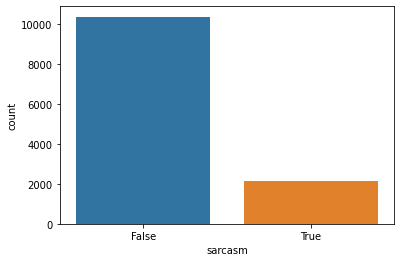

In [ ]:
sns.countplot(x = 'sarcasm', data = df)

In [ ]:
df['sarcasm'].value_counts()

False    10380
True      2168
Name: sarcasm, dtype: int64

## Data Cleaning 

In [ ]:
import nltk 
nltk.download('stopwords')
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ«»'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    return ''.join([char if char  not in punctuations_list else ' ' for char  in text])


def replace_numbers(text):
  numbers=['٩', '٨', '٧', '٦', '٥', '٤', '٣', '٢', '١','٠']
  return ''.join([char for char in text if char not in numbers ])



In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

def clean(text):
    text=re.sub(r'[a-zA-Z]*',"",text)
    text = re.sub(r'[0-9]*', '', text)
    text=emoji_pattern.sub(' ', text)
    text=replace_numbers(text)
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text=text.replace('#',' ')
    text=text.replace('_',' ')
    text=' '.join([word for word in text.split() if word not in arb_stopwords])
    text=remove_punctuations(text)
    text=re.sub('\s+',' ',text)
   

    return text

In [ ]:
def clean2(text):
    text=re.sub(r'[^ا-ي]+',' ',text)
    text=' '.join( [w for w in text.split() if len(w)>2] )
    text=text.replace('_',' ')
    return text

In [ ]:
df['tweet_clean']=df['tweet'].apply(clean)

In [ ]:
df['tweet_clean']=df['tweet'].apply(clean2)

In [ ]:
df.head(100)

,tweet,sarcasm,sentiment,dialect,tweet_clean
0,"""د. #محمود_العلايلي:أرى أن الفريق #أحمد_شفيق ر...",False,NEU,msa,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,"""مع فيدرر يا آجا والكبار 😍 https://t.co/hrBeHb...",False,NEU,msa,فيدرر والكبار
2,“الداعون لمبدأ الاختلاط بين الجنسين؛ كالداعين ...,True,NEG,msa,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,"""@ihe_94 @ya78m @amooo5 @badiajnikhar @Oukasaf...",True,NEG,gulf,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,"""قل شرق حلب ولا تقل حلب الشرقية ....وقل غرب حل...",False,NEU,msa,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...
...,...,...,...,...,...
95,"""رامى عياش عملى لايك على اغنيته 😍🙌 https://t.c...",False,POS,egypt,رامى عياش عملى لايك على اغنيته
96,"""@140041Saud الرياض حي الواحةتقاطع شارع رفحاء ...",False,NEU,egypt,الرياض الواحةتقاطع شارع رفحا طريق ابوبكر الصدي...
97,لو أنت من الناس اللي لم تؤيد أو تسكت عن ظلم أو...,False,NEU,msa,الناس اللي تسكت ظلم فشل سوا فترات مبارك المجلس...
98,الهجوم المتوقع على كرداسة متى يتوقفون عن قتل ا...,False,NEG,msa,الهجوم المتوقع على كرداسة متى يتوقفون قتل الاح...


## Back Translation 

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 17.7 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=f8a53fc6f766fd281dcbc4be7c5301ca3a6672ccdc6dba28e74511f7c91db7c3
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
df.drop(['tweet','sentiment','dialect'],axis=1,inplace=True)
df.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...


In [ ]:
df_true=df[df['sarcasm']==True]
print(df_true.shape)
df_true.head(20)

(2168, 2)


,sarcasm,tweet_clean
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
6,True,مرسي هنام اكتر اربع ساعات اليوم نمت دقيقة كمان...
7,True,انتخبوا البرص مشكلة
14,True,وقت الشدة ظنتي الجيش المصري حيوقف السعودية مار...
18,True,مفحوص مفعوص حماة المحتله ترك حماة وحلب والساحل...
21,True,انا اشفق على هيلاري كلنتون فهي مضطره لمناظره خ...
26,True,العصابة الوهابية تحارب جبهة النصرة وتركت جيوش ...
27,True,هههههههههههههه كمان حكاها بشار بعد صلى العيد ب...
28,True,ماجدة واصف عرف سما المصري مهرجان القاهرة السين...


In [ ]:
def back_translation(text):
  translator = Translator()
  en_text=translator.translate(text, dest='en').text
  ar_text=translator.translate(en_text, dest='ar').text
  return ar_text


In [ ]:
back_translation_list=[]
for i in df_true['tweet_clean']:
  back_translation_list.append(back_translation(i))
  

In [ ]:
#len(back_translation_list)
sarcasm_list=[ True for _ in back_translation_list ]

In [ ]:
df_back_translation=pd.DataFrame({'sarcasm':sarcasm_list,'tweet_clean':back_translation_list})

In [ ]:
df_back_translation.head()

,sarcasm,tweet_clean
0,True,أولئك الذين ينادون بالاختلاط بين الجنسين هم مث...
1,True,أيها الفقراء في الصباح ، سنعود إلى Google ، لق...
2,True,مرسي ، هناك أربع ساعات نوم أكثر اليوم. لقد نمت...
3,True,اختر الجذام كمشكلة
4,True,في أوقات الشدة ، اعتقدت أن الجيش المصري سيوقف ...


In [ ]:
df.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...


In [ ]:
df_total = pd.concat([df, df_back_translation], axis=0)
df_total.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...


In [ ]:
df_total.shape

(14716, 2)

In [ ]:
## total_v1 has data generated from  back translation 
df_total.to_csv('/content/drive/MyDrive/sub_task1/total_v1.csv',encoding='utf-8',index=False)

## add Synonym  text 

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


True

In [ ]:
Synonym_list=[]
true_text=[]
for i in df_true['tweet_clean']:
  text_list=[]
  for word in i.split():
    count=0
    try:
      w=wn.synsets(word,lang=('arb'))[0]
      s=w.lemma_names(lang='arb')
      #s.remove(word)
      if len(s)>0:
         text_list.append(s[0])
         count+=1
      else:
        text_list.append(word)   

    except:
      text_list.append(word)   
  if count>0:
    true_text.append(i)
    Synonym_list.append(' '.join(text_list))


    Synonym_list.append(' '.join(text_list))


In [ ]:
sarcasm_list=[ True for _ in Synonym_list ]

In [ ]:
df_Synonym=pd.DataFrame({'sarcasm':sarcasm_list,'tweet_clean':Synonym_list})

In [ ]:
df_Synonym.shape

(328, 2)

In [ ]:
df_total.shape

(14716, 2)

In [ ]:
df_total = pd.concat([df_total, df_Synonym], axis=0)
df_total.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...


In [ ]:
df_total.shape

(15044, 2)

In [ ]:
### total_v2 has Synonym
df_total.to_csv('/content/drive/MyDrive/sub_task1/total_v2.csv',encoding='utf-8',index=False)

### text Similarity 

In [ ]:
##get pretrained ara vec model 
!wget "https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip"   -P '/content/drive/MyDrive/sub_task1'

--2021-09-27 13:23:49--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2833686412 (2.6G) [application/zip]
Saving to: ‘/content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.zip’

full_uni_cbow_300_t 100%[===================>]   2.64G  29.0MB/s    in 78s     

2021-09-27 13:25:08 (34.5 MB/s) - ‘/content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.zip’ saved [2833686412/2833686412]



In [ ]:
!unzip  /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.zip -d '/content/drive/MyDrive/sub_task1'

Archive:  /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.zip
replace /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl  
replace /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl.trainables.syn1neg.npy  y
y

  inflating: /content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl.wv.vectors.npy  y



In [ ]:
t_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/sub_task1/full_uni_cbow_300_twitter.mdl')

In [ ]:
most_similar = t_model.wv.most_similar('السلام', topn=2 )
most_similar[0][0]

'*السلام'

In [ ]:
### first similar
similar_list=[]
true_text=[]
for i in df_true['tweet_clean']:
  text_list=[]
  try:
    for word in i.split():
      count=0
      try:
        most_similar = t_model.wv.most_similar(word, topn=2 )
        new_word =most_similar[0][0]
        if new_word != None:
          text_list.append(new_word)
          count+=1
        else:
          text_list.append(word)   

      except:
        text_list.append(word)   
    if count>0:
      true_text.append(i)
      similar_list.append(' '.join(text_list))
  except:
    pass    
    


In [ ]:
len(similar_list)

1778

In [ ]:
len(true_text)

1778

In [ ]:
sarcasm_list=[ True for _ in similar_list ]

In [ ]:
df_similar1=pd.DataFrame({'sarcasm':sarcasm_list,'tweet_clean':similar_list})

In [ ]:
### similar.csv has similar data first and second similar
df_similar.to_csv('/content/drive/MyDrive/sub_task1/similar.csv',encoding='utf-8',index=False)

In [ ]:
df_total = pd.concat([df_total, df_similar1], axis=0)
df_total.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط بين الجنسين كالداعين لغا...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب ولا تقل حلب الشرقية وقل غرب حلب ولا تق...


In [ ]:
df_total.shape

(16822, 2)

In [ ]:
df_total['sarcasm'].value_counts()

False    10380
True      6442
Name: sarcasm, dtype: int64

In [ ]:
### second similar
similar_list=[]
true_text=[]
for i in df_true['tweet_clean']:
  text_list=[]
  try:
    for word in i.split():
      count=0
      try:
        most_similar = t_model.wv.most_similar(word, topn=2 )
        new_word =most_similar[1][0]
        if new_word != None:
          text_list.append(new_word)
          count+=1
        else:
          text_list.append(word)   

      except:
        text_list.append(word)   
    if count>0:
      true_text.append(i)
      similar_list.append(' '.join(text_list))
  except:
    pass    

In [ ]:
len(similar_list)

In [ ]:
sarcasm_list=[ True for _ in similar_list ]

In [ ]:
df_similar1=pd.DataFrame({'sarcasm':sarcasm_list,'tweet_clean':similar_list})

In [ ]:
df_total.shape

In [ ]:
df_total['sarcasm'].value_counts()

### final balance data 

In [ ]:
df_false=df_total[df_total['sarcasm']==False]
df_false.shape

(10354, 2)

In [ ]:
df_false_copy=df_false.iloc[:1820,:]
df_false_copy.shape

(1820, 2)

In [ ]:
def back_translation(text):
  translator = Translator()
  en_text=translator.translate(text, dest='en').text
  ar_text=translator.translate(en_text, dest='ar').text
  return ar_text


In [ ]:
back_translation_list=[]

for i in df_false_copy['tweet_clean']:
    back_translation_list.append(back_translation(i))

In [ ]:
len(back_translation_list)

1820

In [ ]:
sarcasm_list=[ False for _ in back_translation_list ]

In [ ]:
df_back_translation=pd.DataFrame({'sarcasm':sarcasm_list,'tweet_clean':back_translation_list})

In [ ]:
df_back_translation.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,False,شرق حلب تقل حلب الشرقية وقل غرب حلب تقل حلب ال...
3,False,طبيب المقاصة صابة حمد الشيخ بسيطة تحتاج للراحة...
4,False,هاشتاق العرب هالي القدس يرفعون ذان فوق سطح منا...


In [ ]:
df_total_1 = pd.concat([df_total, df_back_translation], axis=0)
df_total_1.head()

,sarcasm,tweet_clean
0,False,محمود العلايلي الفريق حمد شفيق رقم مهم المعادل...
1,False,فيدرر والكبار
2,True,الداعون لمبد الاختلاط الجنسين كالداعين لغا الت...
3,True,مساكين الصبح هوما رايحين راجعين عاى غوغل تعبت ...
4,False,شرق حلب تقل حلب الشرقية وقل غرب حلب تقل حلب ال...


In [ ]:
df_total_1['sarcasm'].value_counts()

True     12174
False    12174
Name: sarcasm, dtype: int64

In [ ]:
### total_v5 hase final balance data 
df_total_1.to_csv('/content/drive/MyDrive/sub_task1/total_v5.csv',encoding='utf-8',index=False)